In [1]:
from tensorflow.keras import backend as K
K.clear_session()


# ***`Data Preprocessing`***

In [2]:
# Install the 'rarfile' library to handle RAR file extraction in the environment.
!pip install rarfile

In [3]:
# Import necessary libraries for handling files, downloading, and data manipulation
import os
import pandas as pd
import gdown
import rarfile
import shutil

# Download the RAR file from Google Drive
url = 'https://drive.google.com/uc?id=1upl-lvDOFmVZNMFewW-oMcOtYp7KVjWc'
# https://drive.google.com/file/d/1upl-lvDOFmVZNMFewW-oMcOtYp7KVjWc/view?usp=sharing
output_rar = '/content/fitnesstan-Dataset.rar'
gdown.download(url, output_rar, quiet=False)

# Extract the RAR file to access the dataset
with rarfile.RarFile(output_rar, 'r') as rar_ref:
    rar_ref.extractall('/content')

Downloading...
From: https://drive.google.com/uc?id=1upl-lvDOFmVZNMFewW-oMcOtYp7KVjWc
To: /content/fitnesstan-Dataset.rar
100%|██████████| 1.01M/1.01M [00:00<00:00, 67.7MB/s]


### ***Cleaning***

In [4]:
import pandas as pd

# Load the dataset to examine its structure
file_path = '/content/nutrition.csv'
nutrition_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
nutrition_data.head(), nutrition_data.info(), nutrition_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8789 non-null   int64 
 1   name                         8789 non-null   object
 2   serving_size                 8789 non-null   object
 3   calories                     8789 non-null   int64 
 4   total_fat                    8789 non-null   object
 5   saturated_fat                7199 non-null   object
 6   cholesterol                  8789 non-null   object
 7   sodium                       8789 non-null   object
 8   choline                      8789 non-null   object
 9   folate                       8789 non-null   object
 10  folic_acid                   8789 non-null   object
 11  niacin                       8789 non-null   object
 12  pantothenic_acid             8789 non-null   object
 13  riboflavin                   8789

(   Unnamed: 0             name serving_size  calories total_fat saturated_fat  \
 0           0       cornstarch        100 g       381      0.1g           NaN   
 1           1     nuts, pecans        100 g       691       72g          6.2g   
 2           2    eggplant, raw        100 g        25      0.2g           NaN   
 3           3   teff, uncooked        100 g       367      2.4g          0.4g   
 4           4  sherbet, orange        100 g       144        2g          1.2g   
 
   cholesterol    sodium  choline     folate  ... monounsaturated_fatty_acids  \
 0           0   9.00 mg   0.4 mg   0.00 mcg  ...                     0.016 g   
 1           0   0.00 mg  40.5 mg  22.00 mcg  ...                    40.801 g   
 2           0   2.00 mg   6.9 mg  22.00 mcg  ...                     0.016 g   
 3           0  12.00 mg  13.1 mg          0  ...                     0.589 g   
 4         1mg  46.00 mg   7.7 mg   4.00 mcg  ...                     0.530 g   
 
   polyunsaturated

In [5]:
# Correct Typographical Errors in Column Names
nutrition_data.rename(
    columns={
        'irom': 'iron',
        'lucopene': 'lycopene',
        'phosphorous': 'phosphorus',
        'zink': 'zinc'
    },
    inplace=True
)

# Verify the updated column names
print("Updated column names:")
print(nutrition_data.columns.tolist())


Updated column names:
['Unnamed: 0', 'name', 'serving_size', 'calories', 'total_fat', 'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate', 'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin', 'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta', 'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lycopene', 'vitamin_b12', 'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha', 'vitamin_k', 'calcium', 'copper', 'iron', 'magnesium', 'manganese', 'phosphorus', 'potassium', 'selenium', 'zinc', 'protein', 'alanine', 'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine', 'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine', 'methionine', 'phenylalanine', 'proline', 'serine', 'threonine', 'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars', 'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose', 'fat', 'saturated_fatty_acids', 'monounsaturated_fatty_acids', 'polyunsaturated_fatty_acids', 'fat

In [6]:
import pandas as pd
import numpy as np

In [7]:
# Drop the 'Unnamed: 0' column (irrelevant index column)
nutrition_data = nutrition_data.drop(columns=['Unnamed: 0'])

# Identify missing values
missing_values = nutrition_data.isnull().sum()

# Drop columns with more than 50% missing values
nutrition_data = nutrition_data.loc[:, missing_values <= (0.5 * len(nutrition_data))]

# Fill missing values in numerical columns with mean
for column in nutrition_data.select_dtypes(include=['float64', 'int64']).columns:
    nutrition_data[column] = nutrition_data[column].fillna(nutrition_data[column].mean())

# For categorical columns, fill missing with mode
for column in nutrition_data.select_dtypes(include=['object']).columns:
    nutrition_data[column] = nutrition_data[column].fillna(nutrition_data[column].mode()[0])


In [8]:
nutrition_data = nutrition_data.drop_duplicates()

In [9]:
nutrition_data.columns = nutrition_data.columns.str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '')

In [10]:
# Correct Typographical Errors in Column Names
nutrition_data.rename(
    columns={
        'irom': 'iron',
        'lucopene': 'lycopene',
        'phosphorous': 'phosphorus',
        'zink': 'zinc'
    },
    inplace=True
)

# Verify the updated column names
print("Updated column names:")
print(nutrition_data.columns.tolist())

# Essential features based on your selection
essential_features = [
    'calories', 'total_fat',  'cholesterol', 'protein',
    'carbohydrate', 'fiber', 'sugars', 'vitamin_a', 'vitamin_b6', 'vitamin_b12',
    'vitamin_c', 'vitamin_d', 'vitamin_e', 'vitamin_k', 'calcium', 'iron',
    'magnesium', 'potassium', 'zinc', 'saturated_fatty_acids',
    'monounsaturated_fatty_acids', 'polyunsaturated_fatty_acids',
    'fatty_acids_total_trans', 'vegetarian', 'halal'
]

# Filter the dataset to include only essential features
essential_data = nutrition_data[[col for col in essential_features if col in nutrition_data.columns]]

# Save the filtered dataset
filtered_file_path = '/content/essential_features_nutrition_data.csv'
essential_data.to_csv(filtered_file_path, index=False)

# Display the saved file path and the first few rows of the dataset for confirmation
print(f"Filtered dataset saved at: {filtered_file_path}")
essential_data.head()


Updated column names:
['name', 'serving_size', 'calories', 'total_fat', 'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate', 'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin', 'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta', 'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lycopene', 'vitamin_b12', 'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha', 'vitamin_k', 'calcium', 'copper', 'iron', 'magnesium', 'manganese', 'phosphorus', 'potassium', 'selenium', 'zinc', 'protein', 'alanine', 'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine', 'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine', 'methionine', 'phenylalanine', 'proline', 'serine', 'threonine', 'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars', 'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose', 'fat', 'saturated_fatty_acids', 'monounsaturated_fatty_acids', 'polyunsaturated_fatty_acids', 'fatty_acids_total

,calories,total_fat,cholesterol,protein,carbohydrate,fiber,sugars,vitamin_a,vitamin_b6,vitamin_b12,...,iron,magnesium,potassium,zinc,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,vegetarian,halal
0,381,0.1g,0,0.26 g,91.27 g,0.9 g,0.00 g,0.00 IU,0.000 mg,0.00 mcg,...,0.47 mg,3.00 mg,3.00 mg,0.06 mg,0.009 g,0.016 g,0.025 g,0.00 mg,True,True
1,691,72g,0,9.17 g,13.86 g,9.6 g,3.97 g,56.00 IU,0.210 mg,0.00 mcg,...,2.53 mg,121.00 mg,410.00 mg,4.53 mg,6.180 g,40.801 g,21.614 g,0.00 mg,True,True
2,25,0.2g,0,0.98 g,5.88 g,3.0 g,3.53 g,23.00 IU,0.084 mg,0.00 mcg,...,0.23 mg,14.00 mg,229.00 mg,0.16 mg,0.034 g,0.016 g,0.076 g,0.00 mg,True,True
3,367,2.4g,0,13.30 g,73.13 g,8.0 g,1.84 g,9.00 IU,0.482 mg,0,...,7.63 mg,184.00 mg,427.00 mg,3.63 mg,0.449 g,0.589 g,1.071 g,0,True,True
4,144,2g,1mg,1.10 g,30.40 g,1.3 g,24.32 g,46.00 IU,0.023 mg,0.13 mcg,...,0.14 mg,8.00 mg,96.00 mg,0.48 mg,1.160 g,0.530 g,0.080 g,1.00 mg,True,True


In [11]:
import pandas as pd

df = pd.read_csv('/content/essential_features_nutrition_data.csv')
missing_values = df.isnull().sum()
print(missing_values)


calories                       0
total_fat                      0
cholesterol                    0
protein                        0
carbohydrate                   0
fiber                          0
sugars                         0
vitamin_a                      0
vitamin_b6                     0
vitamin_b12                    0
vitamin_c                      0
vitamin_d                      0
vitamin_e                      0
vitamin_k                      0
calcium                        0
iron                           0
magnesium                      0
potassium                      0
zinc                           0
saturated_fatty_acids          0
monounsaturated_fatty_acids    0
polyunsaturated_fatty_acids    0
fatty_acids_total_trans        0
vegetarian                     0
halal                          0
dtype: int64


In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Step 1: Inspect unique values in the columns
print("Unique values in 'vegetarian':", df['vegetarian'].unique())
print("Unique values in 'halal':", df['halal'].unique())

# Step 2: Clean the data (ensure consistent format)
df['vegetarian'] = df['vegetarian'].astype(str).str.strip().str.upper()  # Convert to string, clean whitespace, and convert to uppercase
df['halal'] = df['halal'].astype(str).str.strip().str.upper()

# Step 3: Apply LabelEncoder
label_encoder = LabelEncoder()

# Encode 'vegetarian'
df['vegetarian'] = label_encoder.fit_transform(df['vegetarian'])
vegetarian_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"'vegetarian' Label Mapping: {vegetarian_mapping}")

# Encode 'halal'
df['halal'] = label_encoder.fit_transform(df['halal'])
halal_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"'halal' Label Mapping: {halal_mapping}")

# Display the first few rows to verify
df.head()


Unique values in 'vegetarian': [ True False]
Unique values in 'halal': [ True False]
'vegetarian' Label Mapping: {'FALSE': 0, 'TRUE': 1}
'halal' Label Mapping: {'FALSE': 0, 'TRUE': 1}


,calories,total_fat,cholesterol,protein,carbohydrate,fiber,sugars,vitamin_a,vitamin_b6,vitamin_b12,...,iron,magnesium,potassium,zinc,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,vegetarian,halal
0,381,0.1g,0,0.26 g,91.27 g,0.9 g,0.00 g,0.00 IU,0.000 mg,0.00 mcg,...,0.47 mg,3.00 mg,3.00 mg,0.06 mg,0.009 g,0.016 g,0.025 g,0.00 mg,1,1
1,691,72g,0,9.17 g,13.86 g,9.6 g,3.97 g,56.00 IU,0.210 mg,0.00 mcg,...,2.53 mg,121.00 mg,410.00 mg,4.53 mg,6.180 g,40.801 g,21.614 g,0.00 mg,1,1
2,25,0.2g,0,0.98 g,5.88 g,3.0 g,3.53 g,23.00 IU,0.084 mg,0.00 mcg,...,0.23 mg,14.00 mg,229.00 mg,0.16 mg,0.034 g,0.016 g,0.076 g,0.00 mg,1,1
3,367,2.4g,0,13.30 g,73.13 g,8.0 g,1.84 g,9.00 IU,0.482 mg,0,...,7.63 mg,184.00 mg,427.00 mg,3.63 mg,0.449 g,0.589 g,1.071 g,0,1,1
4,144,2g,1mg,1.10 g,30.40 g,1.3 g,24.32 g,46.00 IU,0.023 mg,0.13 mcg,...,0.14 mg,8.00 mg,96.00 mg,0.48 mg,1.160 g,0.530 g,0.080 g,1.00 mg,1,1


In [13]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

features_to_scale = ['calories', 'total_fat',  'cholesterol', 'protein',
                     'carbohydrate', 'fiber', 'sugars', 'vitamin_a', 'vitamin_b6',
                     'vitamin_b12', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'vitamin_k',
                     'calcium', 'iron', 'magnesium', 'potassium', 'zinc',
                     'saturated_fatty_acids', 'monounsaturated_fatty_acids',
                     'polyunsaturated_fatty_acids', 'fatty_acids_total_trans']

# Step 1: Clean non-numeric characters and convert to float, handling errors by imputing with median
for column in features_to_scale:
    if column in df.columns:
        # Replace non-numeric characters and convert to float, imputing with median for invalid entries
        df[column] = pd.to_numeric(df[column].replace(r'[^\d.]', '', regex=True), errors='coerce')
        df[column] = df[column].fillna(df[column].median())  # Impute with median after conversion

# Initialize and apply StandardScaler to the selected features
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [14]:
# Convert scaled data back to a DataFrame
X = pd.DataFrame(df[features_to_scale], columns=features_to_scale)

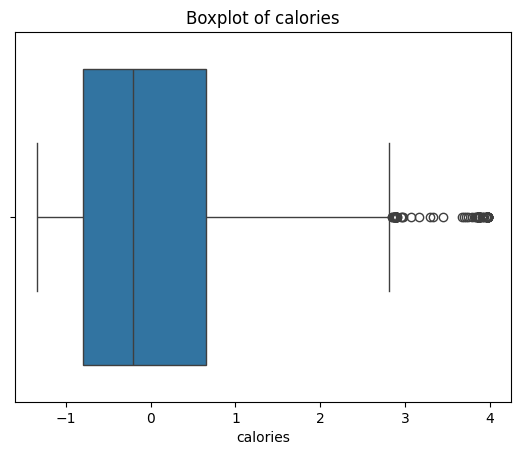

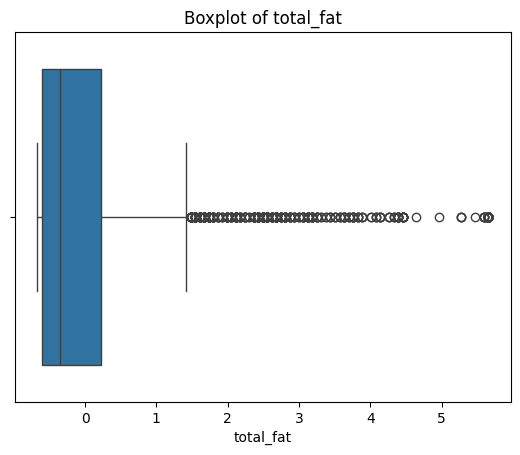

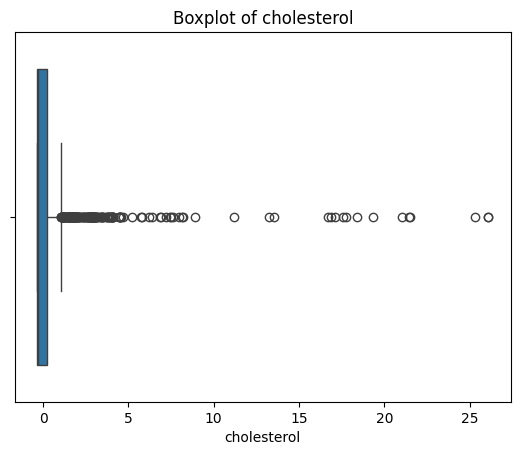

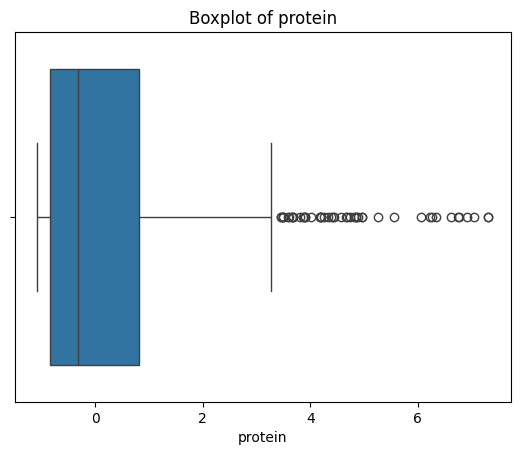

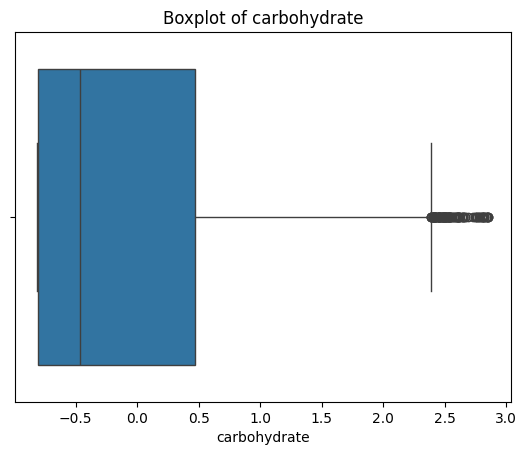

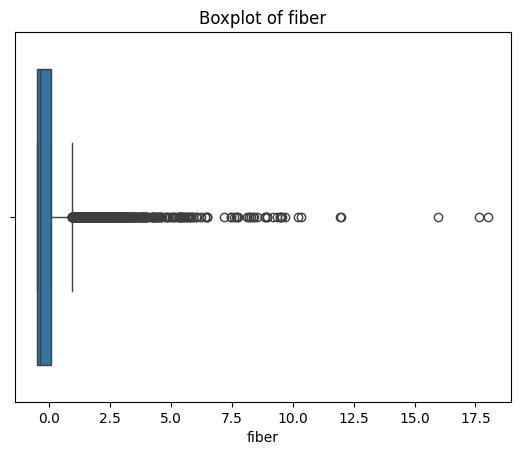

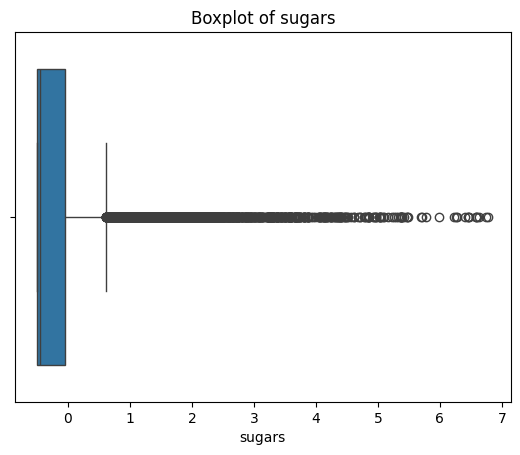

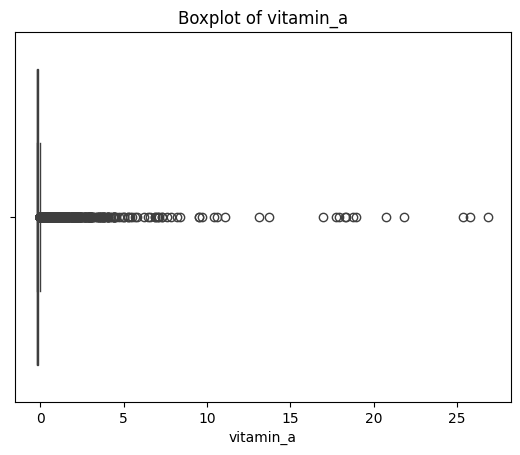

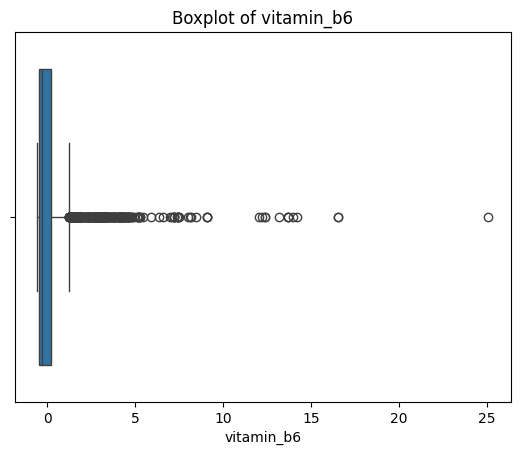

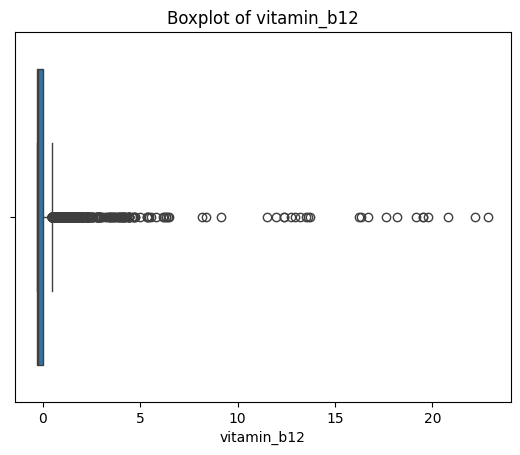

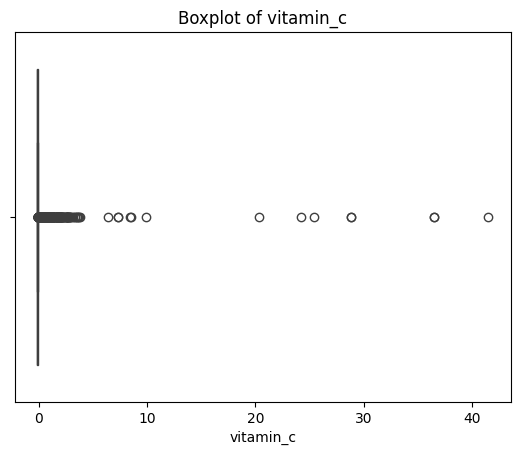

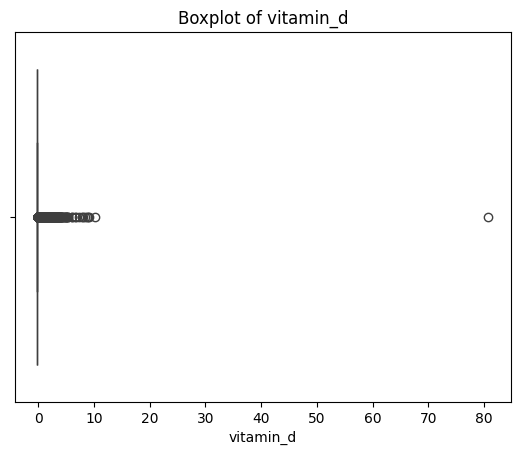

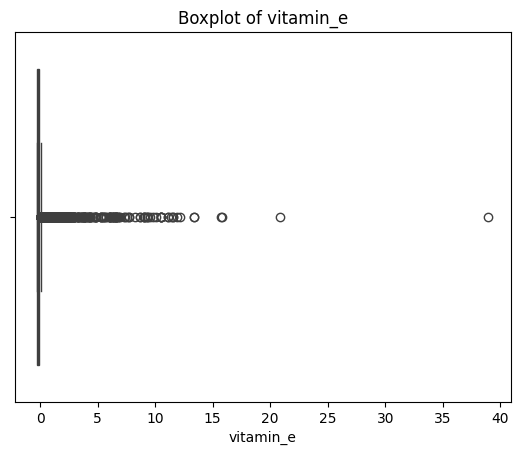

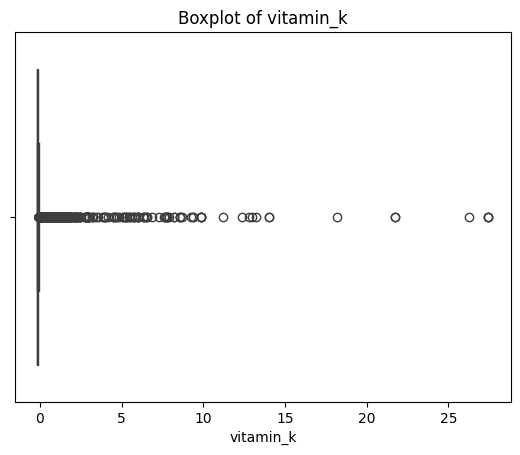

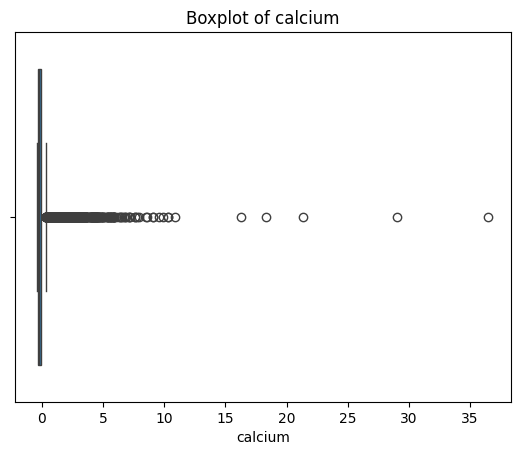

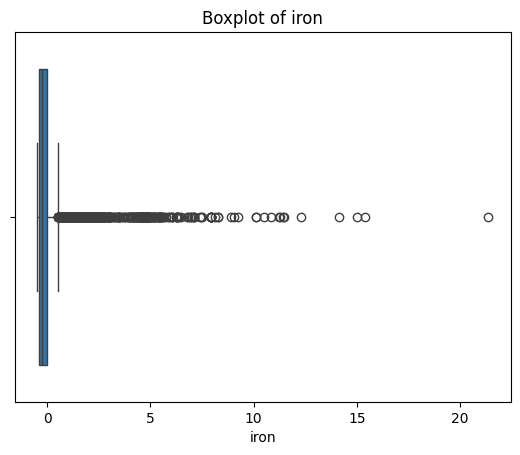

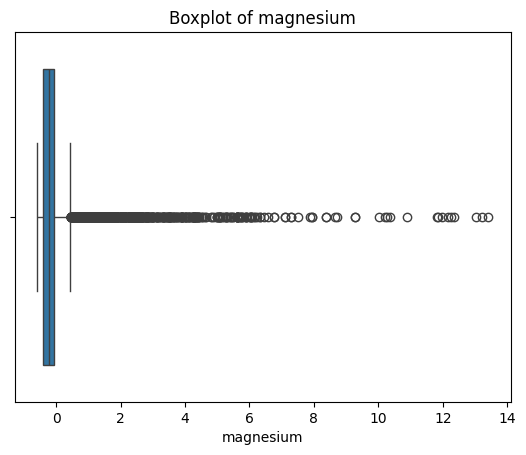

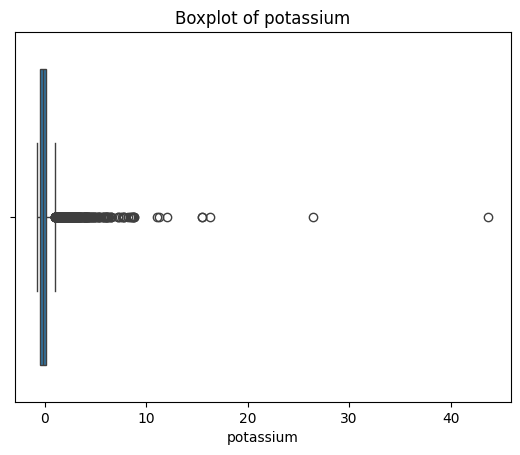

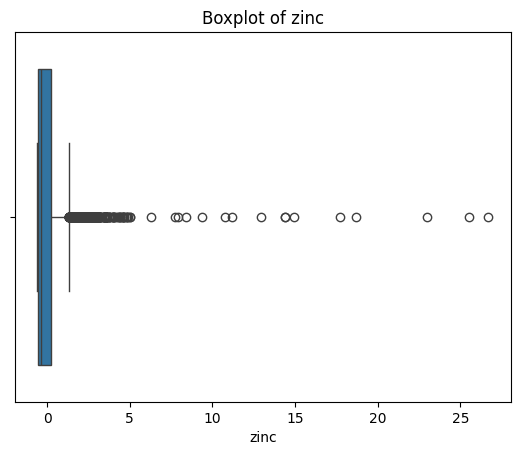

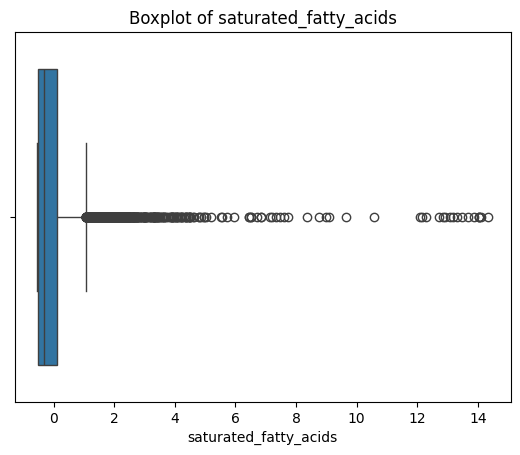

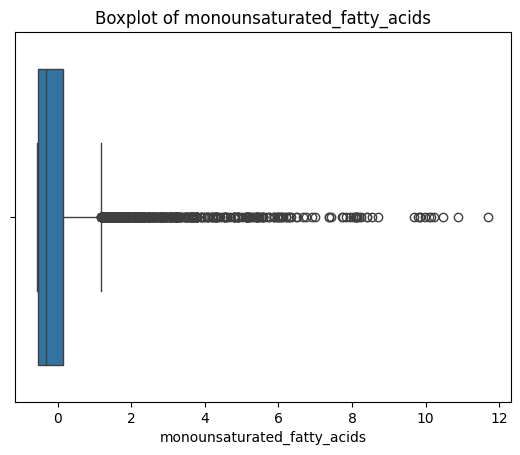

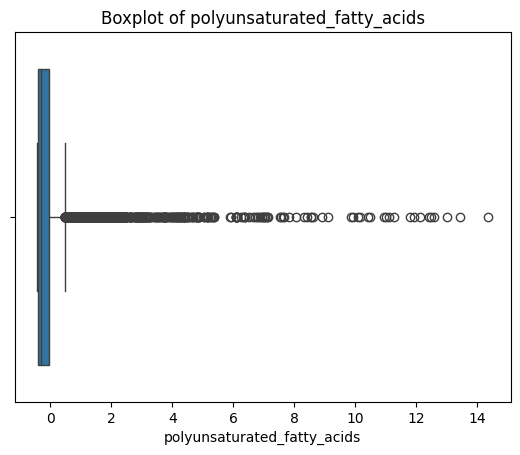

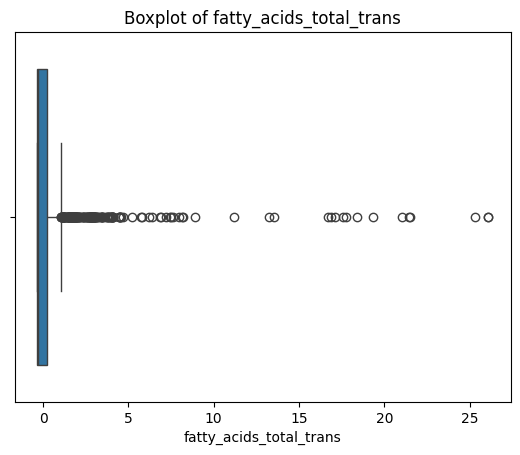

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in features_to_scale:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [16]:
# If not using PCA
final_features = df[features_to_scale + ['vegetarian', 'halal']]

In [17]:
assert final_features.isnull().sum().sum() == 0, "There are missing values in the final dataset."

In [18]:
# Save the cleaned dataset
cleaned_file_path = '/content/cleaned_and_preprocessed_final_features.csv'
final_features.to_csv(cleaned_file_path, index=False)

print(f"Cleaned and preprocessed dataset saved at: {cleaned_file_path}")

Cleaned and preprocessed dataset saved at: /content/cleaned_and_preprocessed_final_features.csv


# ***`Model`***

Original dataset size: 8789, Cleaned dataset size (after outlier removal): 8349


<ipython-input-19-e6d7453a07d9>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'KMeans_Cluster_14'] = kmeans_labels


Clustered data saved to clustered_data_14_clusters_cleaned.csv
Silhouette Score for 14 Clusters: 0.33
Davies-Bouldin Index for 14 Clusters: 0.91


<ipython-input-19-e6d7453a07d9>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['tSNE1'] = tsne_data[:, 0]
<ipython-input-19-e6d7453a07d9>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['tSNE2'] = tsne_data[:, 1]


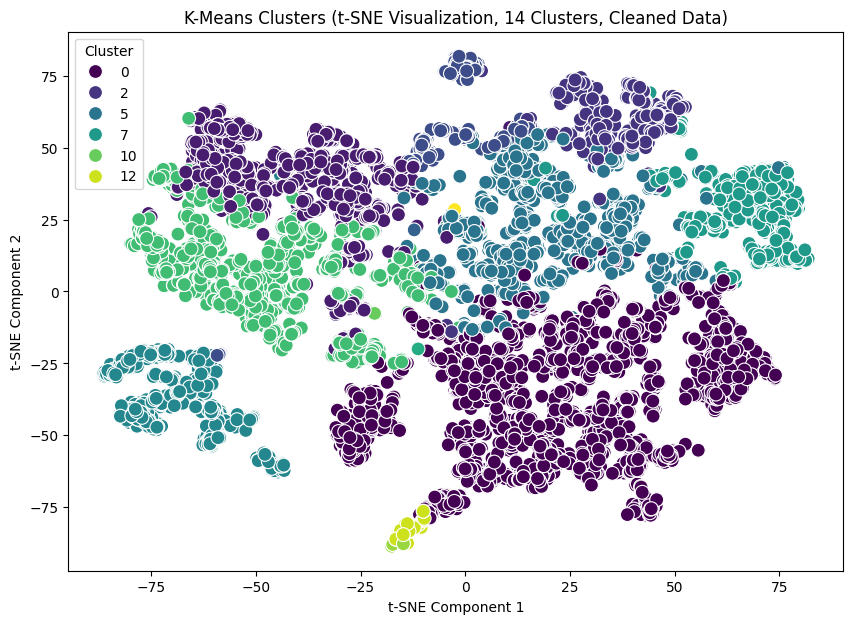

In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load dataset
file_path = "/content/cleaned_and_preprocessed_final_features.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# List of columns for clustering
columns_to_cluster = ['calories', 'total_fat', 'cholesterol', 'protein',
                      'carbohydrate', 'fiber', 'sugars', 'vitamin_a',
                      'vitamin_b6', 'vitamin_b12', 'vitamin_c', 'vitamin_d',
                      'vitamin_e', 'vitamin_k', 'calcium', 'iron',
                      'magnesium', 'potassium', 'zinc', 'saturated_fatty_acids',
                      'monounsaturated_fatty_acids', 'polyunsaturated_fatty_acids',
                      'fatty_acids_total_trans','vegetarian', 'halal']

# Ensure the vegetarian and halal columns are boolean
boolean_columns = ['vegetarian', 'halal']
for column in boolean_columns:
    df[column] = df[column].astype(int)  # Convert True/False to 1/0 if not already

# Add interaction terms for better separation
df['fat_ratio'] = df['saturated_fatty_acids'] / (df['monounsaturated_fatty_acids'] + df['polyunsaturated_fatty_acids'] + 1e-6)
df['fiber_to_carb_ratio'] = df['fiber'] / (df['carbohydrate'] + 1e-6)

# Normalize features using MinMaxScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns_to_cluster + ['fat_ratio', 'fiber_to_carb_ratio']])

# Outlier Detection and Removal using Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = isolation_forest.fit_predict(scaled_data)
df['Outlier'] = outliers
df_cleaned = df[df['Outlier'] == 1]  # Keep only non-outliers
scaled_data_cleaned = scaled_data[df['Outlier'] == 1]

print(f"Original dataset size: {len(df)}, Cleaned dataset size (after outlier removal): {len(df_cleaned)}")

# Perform PCA for dimensionality reduction
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(scaled_data_cleaned)

# Clustering into 20 clusters
kmeans = KMeans(n_clusters=14, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_data)

# Add the cluster labels to the cleaned DataFrame
df_cleaned.loc[:, 'KMeans_Cluster_14'] = kmeans_labels

# Save the K-Means model
with open("kmeans_14_clusters_model.pkl", "wb") as model_file:
    pickle.dump(kmeans, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

with open("pca_model.pkl", "wb") as pca_file:
    pickle.dump(pca, pca_file)

# Save the clustered data
output_file = "clustered_data_14_clusters_cleaned.csv"
df_cleaned.to_csv(output_file, index=False)
print(f"Clustered data saved to {output_file}")

# Compute evaluation metrics
silhouette_avg = silhouette_score(reduced_data, kmeans_labels)
davies_bouldin = davies_bouldin_score(reduced_data, kmeans_labels)
print(f"Silhouette Score for 14 Clusters: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index for 14 Clusters: {davies_bouldin:.2f}")

# Visualization with t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(reduced_data)
df_cleaned['tSNE1'] = tsne_data[:, 0]
df_cleaned['tSNE2'] = tsne_data[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_cleaned, x='tSNE1', y='tSNE2', hue='KMeans_Cluster_14', palette='viridis', s=100)
plt.title('K-Means Clusters (t-SNE Visualization, 14 Clusters, Cleaned Data)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

# Analyze cluster compositions
cluster_composition = df_cleaned['KMeans_Cluster_14'].value_counts()
print("\nCluster Composition:")
print(cluster_composition)

# Save cluster composition for further analysis
cluster_composition.to_csv("cluster_composition.csv", index=True)


<ipython-input-20-099e755b9824>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['tSNE1'] = tsne_data[:, 0]
<ipython-input-20-099e755b9824>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['tSNE2'] = tsne_data[:, 1]


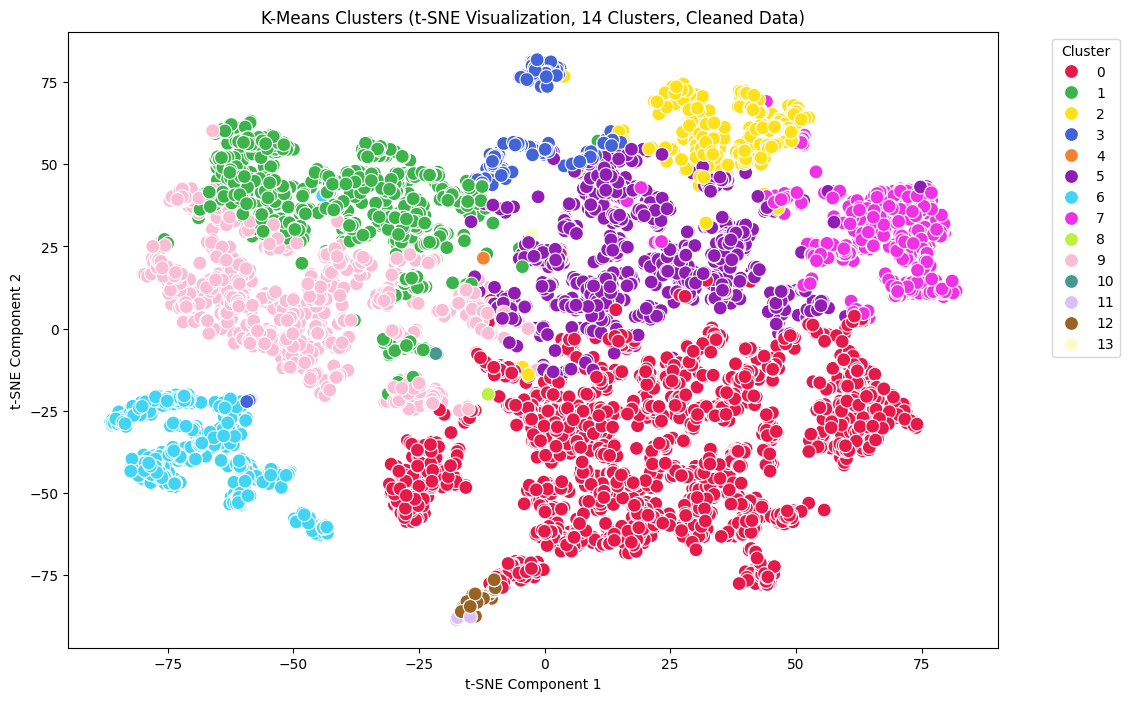

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap

# Define a colormap with 14 distinct colors (update if the number of clusters changes)
colors = ListedColormap([
    '#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6',
    '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8'
])

# Perform t-SNE on the reduced data
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(reduced_data)

# Add the t-SNE components to the DataFrame
df_cleaned['tSNE1'] = tsne_data[:, 0]
df_cleaned['tSNE2'] = tsne_data[:, 1]

# Verify the cluster column exists
cluster_column = 'KMeans_Cluster_14'  # Update if the column name differs
if cluster_column not in df_cleaned.columns:
    raise ValueError(f"Column '{cluster_column}' not found in the DataFrame. Available columns: {df_cleaned.columns}")

# Plot the t-SNE visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_cleaned, x='tSNE1', y='tSNE2',
    hue=cluster_column, palette=colors, s=100, legend='full'
)
plt.title(f'K-Means Clusters (t-SNE Visualization, {len(df_cleaned[cluster_column].unique())} Clusters, Cleaned Data)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [21]:
import pandas as pd

# Load the clustered data
clustered_file_path = "clustered_data_14_clusters_cleaned.csv"
df_clustered = pd.read_csv(clustered_file_path)

# List of nutrient columns for summarization
nutrient_columns = ['calories', 'total_fat', 'cholesterol', 'protein',
                    'carbohydrate', 'fiber', 'sugars', 'vitamin_a',
                    'vitamin_b6', 'vitamin_b12', 'vitamin_c', 'vitamin_d',
                    'vitamin_e', 'vitamin_k', 'calcium', 'iron',
                    'magnesium', 'potassium', 'zinc', 'saturated_fatty_acids',
                    'monounsaturated_fatty_acids', 'polyunsaturated_fatty_acids',
                    'fatty_acids_total_trans', 'fat_ratio', 'fiber_to_carb_ratio',
                    'vegetarian', 'halal']

# Calculate summary statistics for each cluster
cluster_summary = df_clustered.groupby('KMeans_Cluster_14')[nutrient_columns].mean()
cluster_summary['Cluster_Size'] = df_clustered.groupby('KMeans_Cluster_14').size()

# Display the summary statistics for review
print("\nCluster Summary (Mean Values for Nutrients):")
print(cluster_summary)

# Save the cluster summary to a CSV file
output_summary_file = "cluster_summary.csv"
cluster_summary.to_csv(output_summary_file)
print(f"Cluster summary saved to {output_summary_file}")



Cluster Summary (Mean Values for Nutrients):
                   calories  total_fat  cholesterol   protein  carbohydrate  \
KMeans_Cluster_14                                                             
0                 -0.907582  -0.571750    -0.305344 -0.814579     -0.351747   
1                  0.124849   0.302281     0.585087  1.328520     -0.775030   
2                  0.802848  -0.311396    -0.326711  0.116059      1.774977   
3                  2.047763   2.755765    -0.077472 -0.050431     -0.241387   
4                 -0.390244  -0.044689    -0.035986  0.452933     -0.631656   
5                  0.607788   0.160719    -0.166612 -0.211799      0.827051   
6                 -0.122530   0.015169     0.155854  0.448031     -0.521411   
7                  1.185740   0.282641    -0.287117 -0.656116      1.762141   
8                 -0.599249  -0.512529    -0.312930 -0.688567     -0.000804   
9                 -0.418902  -0.269589     0.291741  1.010334     -0.743725   
10    

In [22]:
import csv
import random
from datetime import datetime, timedelta

num_records = 4000

occupations = [
    "Engineer", "Teacher", "Student", "Nurse", "Doctor", "Lawyer", "Artist", "Chef", "Accountant",
    "Architect", "Driver", "Software Developer", "Manager", "Consultant", "Salesperson", "Researcher",
    "Pharmacist", "Electrician", "Carpenter", "Farmer"
]

religions = ["Muslim", "Non-Muslim"]
genders = ["Male", "Female"]
exercise_levels = ["Daily", "6 days a week", "4 days a week", "3 days a week", "2 days a week", "Sedentary"]
sleep_hours_options = ["4-5 hours", "5-6 hours", "6-7 hours", "7-8 hours"]
medical_histories = ["None", "Heart Problem", "Diabetes Problem", "Both Heart and Diabetes"]
cluster_options = [
    [8, 11, 1, 6],
    [11, 1, 4, 8],
    [2, 5, 3, 9],
    [10, 4, 7, 12],
    [8, 11, 1, 6],  # repeating some patterns
    [11, 1, 4, 8]
]

def random_date(start_year=1950, end_year=2005):
    start_date = datetime(start_year, 1, 1)
    end_date = datetime(end_year, 12, 31)
    delta = end_date - start_date
    random_days = random.randrange(delta.days)
    return (start_date + timedelta(days=random_days)).strftime("%m/%d/%Y")

with open("synthetic_data_NEW_4000.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    # Write header
    writer.writerow(["ID","Height (ft)","DOB","Weight (kg)","Gender","Occupation","Religion","Exercise Level","Sleep Hours","Medical History","Target Clusters"])

    for i in range(1, num_records+1):
        height = round(random.uniform(4.5, 6.5), 2)  # in feet
        dob = random_date()
        weight = random.randint(40, 130)
        gender = random.choice(genders)
        occupation = random.choice(occupations)
        religion = random.choice(religions)
        exercise_level = random.choice(exercise_levels)
        sleep_hours = random.choice(sleep_hours_options)
        medical_history = random.choice(medical_histories)
        target_clusters = random.choice(cluster_options)

        # Convert cluster to string format like [8, 11, 1, 6]
        target_clusters_str = "[" + ", ".join(map(str, target_clusters)) + "]"

        writer.writerow([
            i,
            height,
            dob,
            weight,
            gender,
            occupation,
            religion,
            exercise_level,
            sleep_hours,
            medical_history,
            target_clusters_str
        ])

print("synthetic_data.csv has been created with 4000 rows.")


synthetic_data.csv has been created with 4000 rows.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Preprocessing complete. Dataset is ready for training.
Random Forest Test Accuracy: 0.46

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58       260
           1       0.35      0.30      0.32       280
           2       0.55      0.60      0.57       250
           3       0.36      0.37      0.37       286

    accuracy                           0.46      1076
   macro avg       0.46      0.46      0.46      1076
weighted avg       0.45      0.46      0.45      1076


XGBoost Test Accuracy: 0.45

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.53      0.54       260
           1       0.37      0.35      0.36       280
           2       0.54      0.56      0.55       250
           3       0.36      0.38      0.37       286

    accuracy                           0.45      1076
   macro avg       0.45      0.45      0.45      10

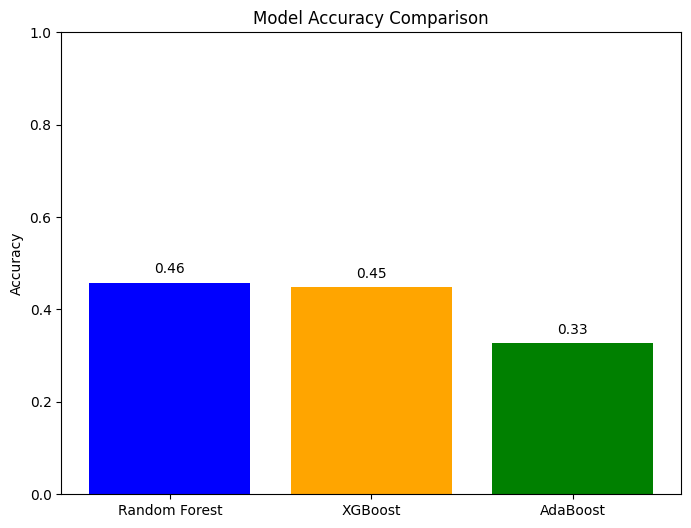


Best Model: Random Forest with Accuracy: 0.46
Best model saved as best_model_Random Forest.pkl


In [24]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import matplotlib.pyplot as plt
import pickle

# Load dataset
file_path = "/content/synthetic_data_NEW_4000.csv"  # Replace with your dataset file path
df = pd.read_csv(file_path)

# Preprocessing
# Extract features and target
target = 'Target Clusters'
features = ['Height (ft)', 'Weight (kg)', 'Gender', 'Occupation', 'Religion',
            'Exercise Level', 'Sleep Hours', 'Medical History']

# Flatten target clusters for multi-class classification
df['Target_Cluster'] = df[target].apply(lambda x: eval(x)[0])  # Take the first cluster as the target

# Add derived features
df['Height (m)'] = df['Height (ft)'] * 0.3048  # Convert height to meters
df['BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)  # Calculate BMI

# Calculate Age from DOB
from datetime import datetime
if 'DOB' in df.columns:
    df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')  # Handle invalid dates
    df['Age'] = datetime.now().year - df['DOB'].dt.year

# Map Exercise Level and Sleep Hours to numerical values
exercise_mapping = {'2 days a week': 2, '4 days a week': 4, '6 days a week': 6, 'Daily': 7}
sleep_mapping = {'4-5 hours': 4.5, '5-6 hours': 5.5, '6-7 hours': 6.5, '7-8 hours': 7.5}
df['Exercise Hours'] = df['Exercise Level'].map(exercise_mapping)
df['Sleep Hours Num'] = df['Sleep Hours'].map(sleep_mapping)
df['Exercise-to-Sleep Ratio'] = df['Exercise Hours'] / df['Sleep Hours Num']

# Update features
features.extend(['BMI', 'Age', 'Exercise-to-Sleep Ratio'])

# Handle missing values
# Define numerical and categorical features
num_features = ['Height (ft)', 'Weight (kg)', 'Height (m)', 'BMI', 'Age', 'Exercise Hours', 'Sleep Hours Num', 'Exercise-to-Sleep Ratio']
cat_features = ['Gender', 'Occupation', 'Religion', 'Exercise Level', 'Sleep Hours', 'Medical History']

# Impute numerical features
num_imputer = SimpleImputer(strategy='mean')
df[num_features] = num_imputer.fit_transform(df[num_features])

# Impute categorical features
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_features] = cat_imputer.fit_transform(df[cat_features])

# Encode categorical features
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for later use

# Feature scaling for numerical columns
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Define features and labels
X = df[features].values
y = df['Target_Cluster'].values

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

print("Preprocessing complete. Dataset is ready for training.")

# Map target labels to sequential integers for classifiers
unique_labels = sorted(np.unique(y_balanced))  # Get sorted unique labels
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}  # Create mapping
reverse_mapping = {idx: label for label, idx in label_mapping.items()}  # Reverse mapping for predictions
y_balanced_mapped = np.array([label_mapping[label] for label in y_balanced])  # Apply mapping

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced_mapped, test_size=0.2, random_state=42)

# Class weights for the dataset
class_weights = compute_class_weight('balanced', classes=np.unique(y_balanced_mapped), y=y_balanced_mapped)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train and Evaluate Models
results = {}
models = {}

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
results['Random Forest'] = rf_accuracy
models['Random Forest'] = rf_model
print(f"Random Forest Test Accuracy: {rf_accuracy:.2f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred, zero_division=1))

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.05,
    objective='multi:softmax',
    num_class=len(unique_labels),
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
results['XGBoost'] = xgb_accuracy
models['XGBoost'] = xgb_model
print(f"\nXGBoost Test Accuracy: {xgb_accuracy:.2f}")
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_pred, zero_division=1))

# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),  # Use Decision Tree as base classifier
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
adaboost_model.fit(X_train, y_train)
adaboost_pred = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
results['AdaBoost'] = adaboost_accuracy
models['AdaBoost'] = adaboost_model
print(f"\nAdaBoost Test Accuracy: {adaboost_accuracy:.2f}")
print("\nAdaBoost Classification Report:")
print(classification_report(y_test, adaboost_pred, zero_division=1))

# Compare Performance
plt.figure(figsize=(8, 6))
model_names = list(results.keys())
accuracies = list(results.values())
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')
plt.show()

# Save the Best Model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]:.2f}")

# Save the best model to a file
with open(f"best_model_{best_model_name}.pkl", "wb") as f:
    pickle.dump(best_model, f)
print(f"Best model saved as best_model_{best_model_name}.pkl")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Random Forest Test Accuracy: 0.46

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58       260
           1       0.35      0.30      0.32       280
           2       0.55      0.60      0.57       250
           3       0.36      0.37      0.37       286

    accuracy                           0.46      1076
   macro avg       0.46      0.46      0.46      1076
weighted avg       0.45      0.46      0.45      1076


XGBoost Test Accuracy: 0.45

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.53      0.54       260
           1       0.37      0.35      0.36       280
           2       0.54      0.56      0.55       250
           3       0.36      0.38      0.37       286

    accuracy                           0.45      1076
   macro avg       0.45      0.45      0.45      1076
weighted avg       0.45      0.45      0.45      107

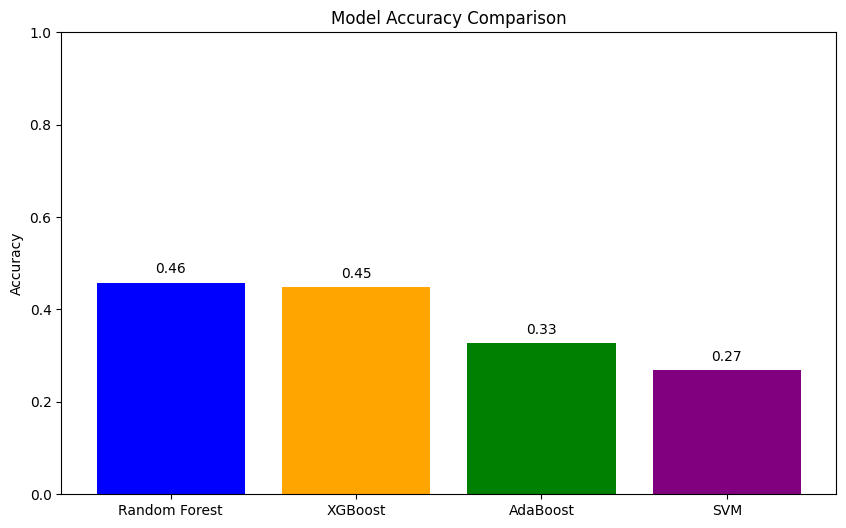


Best Model: Random Forest with Accuracy: 0.46
Best model saved as best_model_Random Forest.pkl


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pickle

# Load dataset
file_path = "/content/synthetic_data_NEW_4000.csv"  # Replace with your dataset file path
df = pd.read_csv(file_path)

# Preprocessing
# Extract features and target
target = 'Target Clusters'
features = ['Height (ft)', 'Weight (kg)', 'Gender', 'Occupation', 'Religion',
            'Exercise Level', 'Sleep Hours', 'Medical History']

# Flatten target clusters for multi-class classification
df['Target_Cluster'] = df[target].apply(lambda x: eval(x)[0])  # Take the first cluster as the target

# Add derived features
df['Height (m)'] = df['Height (ft)'] * 0.3048  # Convert height to meters
df['BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)  # Calculate BMI

# **Add New Features: Age and Exercise-to-Sleep Ratio**
from datetime import datetime
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df['Age'] = datetime.now().year - df['DOB'].dt.year

# Map Exercise Level and Sleep Hours to numerical values
exercise_mapping = {'2 days a week': 2, '4 days a week': 4, '6 days a week': 6, 'Daily': 7}
sleep_mapping = {'4-5 hours': 4.5, '5-6 hours': 5.5, '6-7 hours': 6.5, '7-8 hours': 7.5}
df['Exercise Hours'] = df['Exercise Level'].map(exercise_mapping)
df['Sleep Hours Num'] = df['Sleep Hours'].map(sleep_mapping)
df['Exercise-to-Sleep Ratio'] = df['Exercise Hours'] / df['Sleep Hours Num']

# Update features
features.extend(['BMI', 'Age', 'Exercise-to-Sleep Ratio'])

# Handle missing values
num_features = ['Height (ft)', 'Weight (kg)', 'Height (m)', 'BMI', 'Age', 'Exercise Hours', 'Sleep Hours Num', 'Exercise-to-Sleep Ratio']
cat_features = ['Gender', 'Occupation', 'Religion', 'Exercise Level', 'Sleep Hours', 'Medical History']

# Impute missing values
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='mean')
df[num_features] = num_imputer.fit_transform(df[num_features])
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_features] = cat_imputer.fit_transform(df[cat_features])

# Encode categorical features
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature scaling for numerical columns
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Define features and labels
X = df[features].values
y = df['Target_Cluster'].values

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Map target labels to sequential integers for classifiers
unique_labels = sorted(np.unique(y_balanced))
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
reverse_mapping = {idx: label for label, idx in label_mapping.items()}
y_balanced_mapped = np.array([label_mapping[label] for label in y_balanced])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced_mapped, test_size=0.2, random_state=42)

# Class weights for the dataset
class_weights = compute_class_weight('balanced', classes=np.unique(y_balanced_mapped), y=y_balanced_mapped)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train and Evaluate Models
results = {}
models = {}

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
results['Random Forest'] = rf_accuracy
models['Random Forest'] = rf_model
print(f"Random Forest Test Accuracy: {rf_accuracy:.2f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred, zero_division=1))

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.05,
    objective='multi:softmax',
    num_class=len(unique_labels),
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
results['XGBoost'] = xgb_accuracy
models['XGBoost'] = xgb_model
print(f"\nXGBoost Test Accuracy: {xgb_accuracy:.2f}")
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_pred, zero_division=1))

# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
adaboost_model.fit(X_train, y_train)
adaboost_pred = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
results['AdaBoost'] = adaboost_accuracy
models['AdaBoost'] = adaboost_model
print(f"\nAdaBoost Test Accuracy: {adaboost_accuracy:.2f}")
print("\nAdaBoost Classification Report:")
print(classification_report(y_test, adaboost_pred, zero_division=1))

# SVM Classifier
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
results['SVM'] = svm_accuracy
models['SVM'] = svm_model
print(f"\nSVM Test Accuracy: {svm_accuracy:.2f}")
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred, zero_division=1))

# Compare Performance
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
accuracies = list(results.values())
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'purple'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')
plt.show()

# Save the Best Model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]:.2f}")

# Save the best model to a file
with open(f"best_model_{best_model_name}.pkl", "wb") as f:
    pickle.dump(best_model, f)
print(f"Best model saved as best_model_{best_model_name}.pkl")

In [26]:
!pip install pytorch-tabnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.7 MB/s eta 0:00:00


In [30]:
import pandas as pd

# Load the clustered data (after outlier removal and PCA)
clustered_data_path = "clustered_data_14_clusters_cleaned.csv"  # Path to the file with clustered data
df_cleaned = pd.read_csv(clustered_data_path)

# Define nutritional diet tags for each of the 14 clusters
cluster_nutritional_diet = {
    0: "High Protein, Low Fat",
    1: "Low Carb, High Fiber",
    2: "Balanced Diet",
    3: "High Sugar, Low Fiber",
    4: "Low Cholesterol",
    5: "Rich in Vitamins",
    6: "High Calorie Snacks",
    7: "Low Sodium",
    8: "High Iron Content",
    9: "Rich in Calcium",
    10: "Low Calorie, Low Fat",
    11: "High Potassium Foods",
    12: "Vitamin C Rich",
    13: "Low Fatty Acids"
}

# Map the nutritional diet tags to each cluster
df_cleaned['Cluster_Tag'] = df_cleaned['KMeans_Cluster_14'].map(cluster_nutritional_diet)

# Save the updated DataFrame with the new Cluster_Tag column
updated_file_path = "clustered_data_with_tags.csv"
df_cleaned.to_csv(updated_file_path, index=False)

print(f"Updated file with cluster tags saved as {updated_file_path}")

# Optional: Show a preview of the updated data (first 20 rows)
print("\nPreview of the updated data:")
print(df_cleaned[['KMeans_Cluster_14', 'Cluster_Tag']].head(20))


Updated file with cluster tags saved as clustered_data_with_tags.csv

Preview of the updated data:
    KMeans_Cluster_14            Cluster_Tag
0                   5       Rich in Vitamins
1                   3  High Sugar, Low Fiber
2                   0  High Protein, Low Fat
3                   2          Balanced Diet
4                   0  High Protein, Low Fat
5                   0  High Protein, Low Fat
6                   0  High Protein, Low Fat
7                   1   Low Carb, High Fiber
8                   5       Rich in Vitamins
9                   5       Rich in Vitamins
10                  0  High Protein, Low Fat
11                  7             Low Sodium
12                  0  High Protein, Low Fat
13                  5       Rich in Vitamins
14                  9        Rich in Calcium
15                  9        Rich in Calcium
16                  5       Rich in Vitamins
17                  0  High Protein, Low Fat
18                  0  High Protein, Low Fat
1

In [31]:
!pip install --upgrade xgboost scikit-learn


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Checking for duplicates and missing values...
Dropped 2006 duplicate rows.
Data shape after cleaning: (1994, 18)
Before SMOTE: Counter({8: 664, 11: 655, 2: 365, 10: 310})
After SMOTE: Counter({11: 664, 8: 664, 10: 664, 2: 664})

Training Random Forest Classifier...
Random Forest Best Params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Test Accuracy: 0.51

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       133
           1       0.38      0.42      0.40       133
           2       0.72      0.59      0.65       133
           3       0.34      0.39      0.36       133

    accuracy                           0.51       532
   macro avg       0.53      0.51      0.51       532
weighted avg       0.53      0.51      0.51       532


Training AdaBoost Classifier...
AdaBoost Best Params: {'estimator__max_depth': 5, 'learning_rate': 1.0, 'n_estima

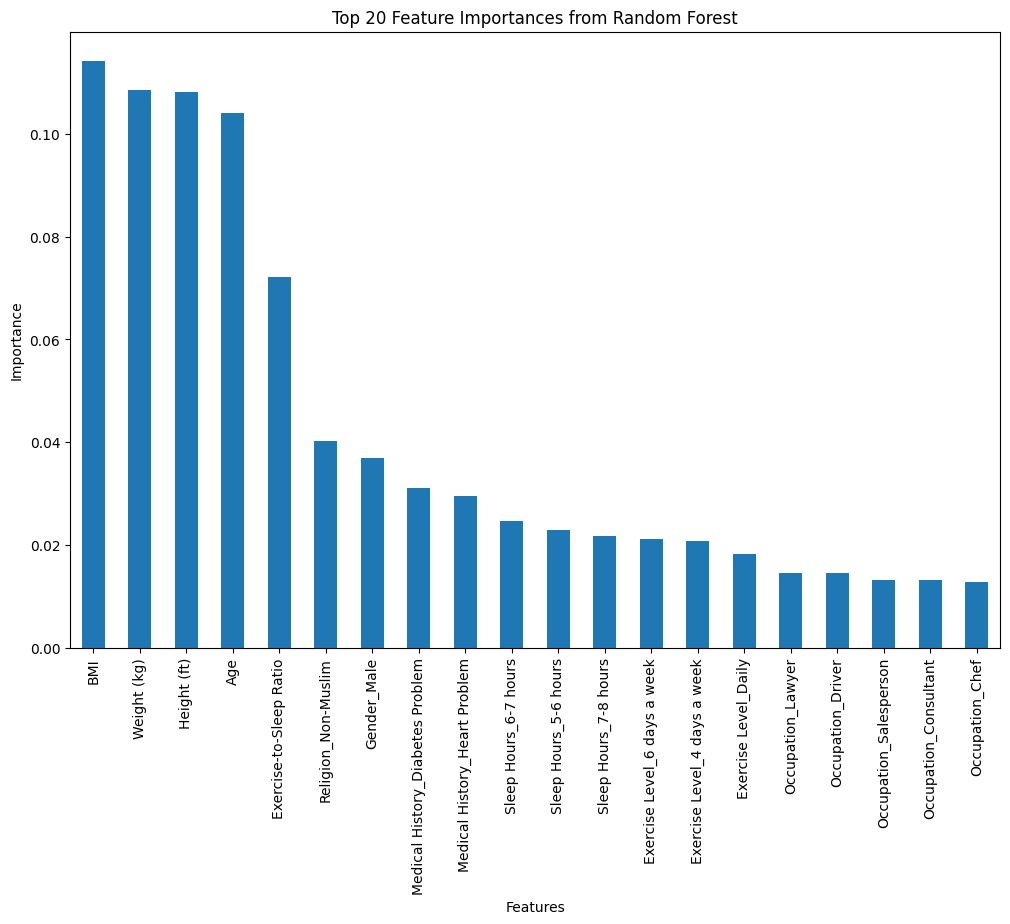


Training Voting Classifier...
VotingClassifier Test Accuracy: 0.50

VotingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59       133
           1       0.35      0.40      0.37       133
           2       0.68      0.60      0.64       133
           3       0.40      0.44      0.42       133

    accuracy                           0.50       532
   macro avg       0.51      0.50      0.50       532
weighted avg       0.51      0.50      0.50       532


Performing Cross-Validation for Random Forest...
Random Forest Cross-Validation Accuracy: 0.52 ± 0.13

Comparing Model Accuracies...


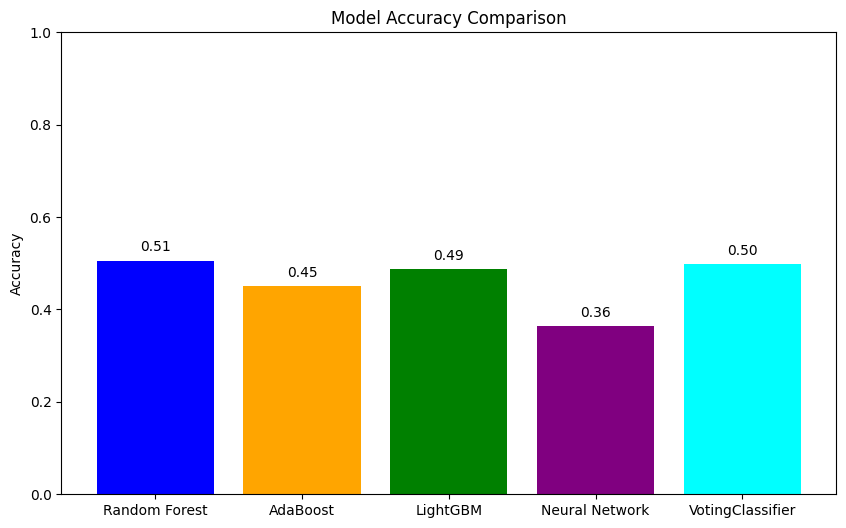


Best Model: Random Forest with Accuracy: 0.51
Best model saved as best_model_Random Forest.pkl


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

# 1. Load Dataset
file_path = "/content/synthetic_data_NEW_4000.csv"  # Replace with your dataset file path
df = pd.read_csv(file_path)

# 2. Data Preprocessing

# 2.1 Extract Features and Target
target_column = 'Target Clusters'
feature_columns = ['Height (ft)', 'Weight (kg)', 'Gender', 'Occupation', 'Religion',
                   'Exercise Level', 'Sleep Hours', 'Medical History']

# 2.2 Flatten Target Clusters for Multi-Class Classification
df['Target_Cluster'] = df[target_column].apply(lambda x: eval(x)[0])  # Take the first cluster as the target

# 2.3 Feature Engineering
df['Height (m)'] = df['Height (ft)'] * 0.3048  # Convert height to meters
df['BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)  # Calculate BMI

# Calculate Age from DOB
df['DOB'] = pd.to_datetime(df['DOB'])
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['DOB'].dt.year

# Map Exercise Level and Sleep Hours to numerical values
exercise_mapping = {'2 days a week': 2, '4 days a week': 4, '6 days a week': 6, 'Daily': 7}
sleep_mapping = {'4-5 hours': 4.5, '5-6 hours': 5.5, '6-7 hours': 6.5, '7-8 hours': 7.5}
df['Exercise Hours'] = df['Exercise Level'].map(exercise_mapping)
df['Sleep Hours Num'] = df['Sleep Hours'].map(sleep_mapping)
df['Exercise-to-Sleep Ratio'] = df['Exercise Hours'] / df['Sleep Hours Num']

# Update feature columns with new features
feature_columns.extend(['BMI', 'Age', 'Exercise-to-Sleep Ratio'])

# 2.4 Define Categorical and Numerical Columns
categorical_cols = ['Gender', 'Occupation', 'Religion', 'Exercise Level', 'Sleep Hours', 'Medical History']
numeric_cols = [col for col in feature_columns if col not in categorical_cols]

# 2.5 Handle Missing Values and Duplicates
print("Checking for duplicates and missing values...")
initial_shape = df.shape
df = df.drop_duplicates()
df = df.dropna()
final_shape = df.shape
print(f"Dropped {initial_shape[0] - final_shape[0]} duplicate rows.")
print(f"Data shape after cleaning: {final_shape}")

# 2.6 Feature Encoding and Scaling using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Apply preprocessing
X = preprocessor.fit_transform(df[feature_columns])
y = df['Target_Cluster'].values

# 2.7 Balancing the Dataset using SMOTE
print("Before SMOTE:", Counter(y))
smote = SMOTE(random_state=RANDOM_STATE)
X_balanced, y_balanced = smote.fit_resample(X, y)
print("After SMOTE:", Counter(y_balanced))

# 2.8 Map Target Labels to Sequential Integers for Classifiers
unique_labels = sorted(np.unique(y_balanced))
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
reverse_mapping = {idx: label for label, idx in label_mapping.items()}
y_mapped = np.array([label_mapping[label] for label in y_balanced])

# 2.9 Split Data into Training and Testing Sets with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_mapped, test_size=0.2, random_state=RANDOM_STATE, stratify=y_mapped
)

# 2.10 Compute Class Weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# 3. Model Training and Evaluation

# Initialize dictionaries to store results and models
results = {}
models = {}

# 3.1 Random Forest Classifier with Hyperparameter Tuning
print("\nTraining Random Forest Classifier...")
rf = RandomForestClassifier(random_state=RANDOM_STATE, class_weight="balanced")
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 12, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1, scoring='accuracy')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
results['Random Forest'] = rf_accuracy
models['Random Forest'] = rf_best
print(f"Random Forest Best Params: {rf_grid.best_params_}")
print(f"Random Forest Test Accuracy: {rf_accuracy:.2f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred, zero_division=1))

# 3.3 AdaBoost Classifier with Hyperparameter Tuning (Corrected)
print("\nTraining AdaBoost Classifier...")
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
    random_state=RANDOM_STATE
)
adaboost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 3, 5]  # Corrected parameter name
}
adaboost_grid = GridSearchCV(adaboost, adaboost_params, cv=3, n_jobs=-1, scoring='accuracy')
adaboost_grid.fit(X_train, y_train)
adaboost_best = adaboost_grid.best_estimator_
adaboost_pred = adaboost_best.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
results['AdaBoost'] = adaboost_accuracy
models['AdaBoost'] = adaboost_best
print(f"AdaBoost Best Params: {adaboost_grid.best_params_}")
print(f"AdaBoost Test Accuracy: {adaboost_accuracy:.2f}")
print("\nAdaBoost Classification Report:")
print(classification_report(y_test, adaboost_pred, zero_division=1))

# 3.4 LightGBM Classifier with Hyperparameter Tuning
print("\nTraining LightGBM Classifier...")
lgbm_clf = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(unique_labels),
    random_state=RANDOM_STATE
)
lgbm_params = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70]
}
lgbm_grid = GridSearchCV(lgbm_clf, lgbm_params, cv=3, n_jobs=-1, scoring='accuracy')
lgbm_grid.fit(X_train, y_train)
lgbm_best = lgbm_grid.best_estimator_
lgbm_pred = lgbm_best.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
results['LightGBM'] = lgbm_accuracy
models['LightGBM'] = lgbm_best
print(f"LightGBM Best Params: {lgbm_grid.best_params_}")
print(f"LightGBM Test Accuracy: {lgbm_accuracy:.2f}")
print("\nLightGBM Classification Report:")
print(classification_report(y_test, lgbm_pred, zero_division=1))

# 3.5 Deep Neural Network (DNN)
print("\nTraining Deep Neural Network...")
def create_dnn(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

dnn_model = create_dnn(X_train.shape[1], len(unique_labels))
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = dnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate DNN
dnn_loss, dnn_accuracy = dnn_model.evaluate(X_test, y_test, verbose=0)
results['Neural Network'] = dnn_accuracy
models['Neural Network'] = dnn_model
print(f"DNN Test Accuracy: {dnn_accuracy:.2f}")

# DNN Classification Report
dnn_pred_probs = dnn_model.predict(X_test)
dnn_pred = np.argmax(dnn_pred_probs, axis=1)
print("\nDNN Classification Report:")
print(classification_report(y_test, dnn_pred, zero_division=1))

# 3.6 Feature Importance Analysis using Random Forest
print("\nAnalyzing Feature Importances from Random Forest...")
importances = rf_best.feature_importances_
# Retrieve feature names from preprocessor
num_features = preprocessor.named_transformers_['num'].get_feature_names_out(numeric_cols)
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = list(num_features) + list(cat_features)
feature_importances = pd.Series(importances, index=all_features).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
feature_importances.head(20).plot(kind='bar')
plt.title('Top 20 Feature Importances from Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

# 3.7 Voting Classifier (Ensemble of Multiple Models)
print("\nTraining Voting Classifier...")
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_best),
        ('adaboost', adaboost_best),
        ('lgbm', lgbm_best)
    ],
    voting='soft',
    n_jobs=-1
)
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_pred)
results['VotingClassifier'] = voting_accuracy
models['VotingClassifier'] = voting_clf
print(f"VotingClassifier Test Accuracy: {voting_accuracy:.2f}")
print("\nVotingClassifier Classification Report:")
print(classification_report(y_test, voting_pred, zero_division=1))

# 3.8 Cross-Validation for Random Forest
print("\nPerforming Cross-Validation for Random Forest...")
cv_scores = cross_val_score(rf_best, X_balanced, y_mapped, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Random Forest Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# 4. Model Performance Comparison
print("\nComparing Model Accuracies...")
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
accuracies = list(results.values())
colors = ['blue', 'orange', 'green', 'purple', 'cyan']
plt.bar(model_names, accuracies, color=colors[:len(model_names)])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')
plt.show()

# 5. Save the Best Model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]:.2f}")

if best_model_name == 'Neural Network':
    # Save Keras model
    best_model.save(f"best_model_{best_model_name}.h5")
    print(f"Best model saved as best_model_{best_model_name}.h5")
else:
    # Save scikit-learn model
    with open(f"best_model_{best_model_name}.pkl", "wb") as f:
        pickle.dump(best_model, f)
    print(f"Best model saved as best_model_{best_model_name}.pkl")


In [33]:
pip install --upgrade xgboost scikit-learn


Checking for duplicates and missing values...
Dropped 2006 duplicate rows.
Data shape after cleaning: (1994, 18)
Before SMOTE: Counter({8: 664, 11: 655, 2: 365, 10: 310})
After SMOTE: Counter({11: 664, 8: 664, 10: 664, 2: 664})

Training Random Forest Classifier...
Random Forest Best Params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Test Accuracy: 0.51

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       133
           1       0.38      0.42      0.40       133
           2       0.72      0.59      0.65       133
           3       0.34      0.39      0.36       133

    accuracy                           0.51       532
   macro avg       0.53      0.51      0.51       532
weighted avg       0.53      0.51      0.51       532


Training AdaBoost Classifier...
AdaBoost Best Params: {'estimator__max_depth': 5, 'learning_rate': 1.0, 'n_estima

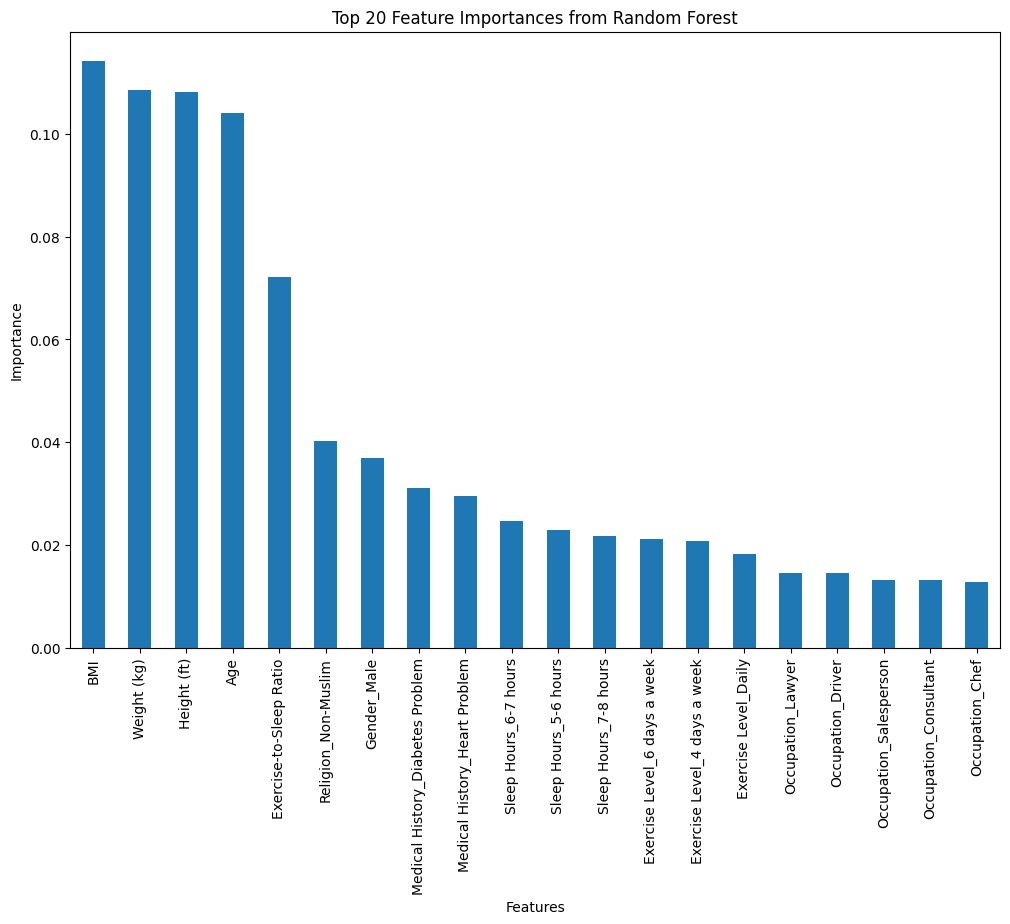


Training Voting Classifier...
VotingClassifier Test Accuracy: 0.50

VotingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59       133
           1       0.35      0.40      0.37       133
           2       0.68      0.60      0.64       133
           3       0.40      0.44      0.42       133

    accuracy                           0.50       532
   macro avg       0.51      0.50      0.50       532
weighted avg       0.51      0.50      0.50       532


Performing Cross-Validation for Random Forest...
Random Forest Cross-Validation Accuracy: 0.52 ± 0.13

Comparing Model Accuracies...


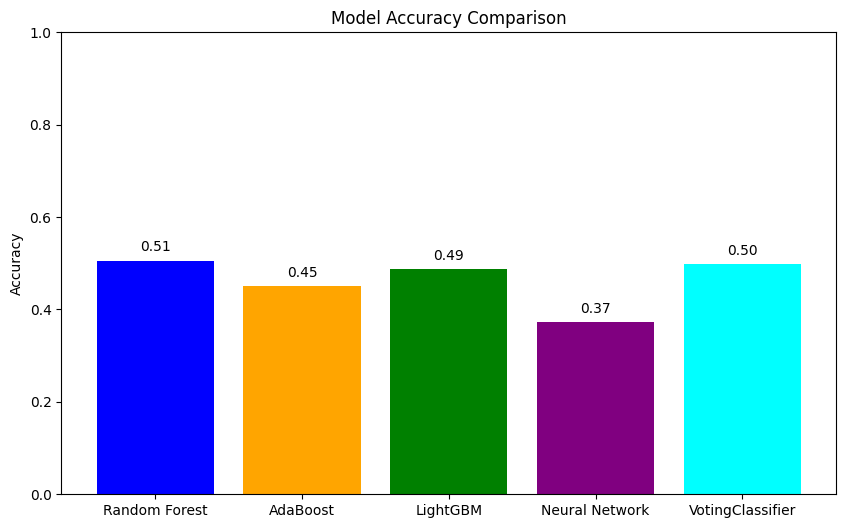


Best Model: Random Forest with Accuracy: 0.51
Best model saved as models/best_model_Random Forest.pkl
Preprocessor saved as models/preprocessor.pkl
Label mapping saved as models/label_mapping.pkl


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter
import warnings
import os

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

# 1. Load Dataset
file_path = "/content/synthetic_data_NEW_4000.csv"  # Replace with your dataset file path
df = pd.read_csv(file_path)

# 2. Data Preprocessing

# 2.1 Extract Features and Target
target_column = 'Target Clusters'
feature_columns = ['Height (ft)', 'Weight (kg)', 'Gender', 'Occupation', 'Religion',
                   'Exercise Level', 'Sleep Hours', 'Medical History']

# 2.2 Flatten Target Clusters for Multi-Class Classification
df['Target_Cluster'] = df[target_column].apply(lambda x: eval(x)[0])  # Take the first cluster as the target

# 2.3 Feature Engineering
df['Height (m)'] = df['Height (ft)'] * 0.3048  # Convert height to meters
df['BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)  # Calculate BMI

# Calculate Age from DOB
df['DOB'] = pd.to_datetime(df['DOB'])
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['DOB'].dt.year

# Map Exercise Level and Sleep Hours to numerical values
exercise_mapping = {'2 days a week': 2, '4 days a week': 4, '6 days a week': 6, 'Daily': 7}
sleep_mapping = {'4-5 hours': 4.5, '5-6 hours': 5.5, '6-7 hours': 6.5, '7-8 hours': 7.5}
df['Exercise Hours'] = df['Exercise Level'].map(exercise_mapping)
df['Sleep Hours Num'] = df['Sleep Hours'].map(sleep_mapping)
df['Exercise-to-Sleep Ratio'] = df['Exercise Hours'] / df['Sleep Hours Num']

# Update feature columns with new features
feature_columns.extend(['BMI', 'Age', 'Exercise-to-Sleep Ratio'])

# 2.4 Define Categorical and Numerical Columns
categorical_cols = ['Gender', 'Occupation', 'Religion', 'Exercise Level', 'Sleep Hours', 'Medical History']
numeric_cols = [col for col in feature_columns if col not in categorical_cols]

# 2.5 Handle Missing Values and Duplicates
print("Checking for duplicates and missing values...")
initial_shape = df.shape
df = df.drop_duplicates()
df = df.dropna()
final_shape = df.shape
print(f"Dropped {initial_shape[0] - final_shape[0]} duplicate rows.")
print(f"Data shape after cleaning: {final_shape}")

# 2.6 Feature Encoding and Scaling using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Fit the preprocessor and transform the data
X = preprocessor.fit_transform(df[feature_columns])
y = df['Target_Cluster'].values

# 2.7 Balancing the Dataset using SMOTE
print("Before SMOTE:", Counter(y))
smote = SMOTE(random_state=RANDOM_STATE)
X_balanced, y_balanced = smote.fit_resample(X, y)
print("After SMOTE:", Counter(y_balanced))

# 2.8 Map Target Labels to Sequential Integers for Classifiers
unique_labels = sorted(np.unique(y_balanced))
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
reverse_mapping = {idx: label for label, idx in label_mapping.items()}
y_mapped = np.array([label_mapping[label] for label in y_balanced])

# 2.9 Split Data into Training and Testing Sets with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_mapped, test_size=0.2, random_state=RANDOM_STATE, stratify=y_mapped
)

# 2.10 Compute Class Weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# 3. Model Training and Evaluation

# Initialize dictionaries to store results and models
results = {}
models = {}

# 3.1 Random Forest Classifier with Hyperparameter Tuning
print("\nTraining Random Forest Classifier...")
rf = RandomForestClassifier(random_state=RANDOM_STATE, class_weight="balanced")
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 12, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1, scoring='accuracy')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
results['Random Forest'] = rf_accuracy
models['Random Forest'] = rf_best
print(f"Random Forest Best Params: {rf_grid.best_params_}")
print(f"Random Forest Test Accuracy: {rf_accuracy:.2f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred, zero_division=1))

# 3.3 AdaBoost Classifier with Hyperparameter Tuning
print("\nTraining AdaBoost Classifier...")
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
    random_state=RANDOM_STATE
)
adaboost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 3, 5]
}
adaboost_grid = GridSearchCV(adaboost, adaboost_params, cv=3, n_jobs=-1, scoring='accuracy')
adaboost_grid.fit(X_train, y_train)
adaboost_best = adaboost_grid.best_estimator_
adaboost_pred = adaboost_best.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
results['AdaBoost'] = adaboost_accuracy
models['AdaBoost'] = adaboost_best
print(f"AdaBoost Best Params: {adaboost_grid.best_params_}")
print(f"AdaBoost Test Accuracy: {adaboost_accuracy:.2f}")
print("\nAdaBoost Classification Report:")
print(classification_report(y_test, adaboost_pred, zero_division=1))

# 3.4 LightGBM Classifier with Hyperparameter Tuning
print("\nTraining LightGBM Classifier...")
lgbm_clf = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(unique_labels),
    random_state=RANDOM_STATE
)
lgbm_params = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70]
}
lgbm_grid = GridSearchCV(lgbm_clf, lgbm_params, cv=3, n_jobs=-1, scoring='accuracy')
lgbm_grid.fit(X_train, y_train)
lgbm_best = lgbm_grid.best_estimator_
lgbm_pred = lgbm_best.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
results['LightGBM'] = lgbm_accuracy
models['LightGBM'] = lgbm_best
print(f"LightGBM Best Params: {lgbm_grid.best_params_}")
print(f"LightGBM Test Accuracy: {lgbm_accuracy:.2f}")
print("\nLightGBM Classification Report:")
print(classification_report(y_test, lgbm_pred, zero_division=1))

# 3.5 Deep Neural Network (DNN)
print("\nTraining Deep Neural Network...")
def create_dnn(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

dnn_model = create_dnn(X_train.shape[1], len(unique_labels))
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = dnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate DNN
dnn_loss, dnn_accuracy = dnn_model.evaluate(X_test, y_test, verbose=0)
results['Neural Network'] = dnn_accuracy
models['Neural Network'] = dnn_model
print(f"DNN Test Accuracy: {dnn_accuracy:.2f}")

# DNN Classification Report
dnn_pred_probs = dnn_model.predict(X_test)
dnn_pred = np.argmax(dnn_pred_probs, axis=1)
print("\nDNN Classification Report:")
print(classification_report(y_test, dnn_pred, zero_division=1))

# 3.6 Feature Importance Analysis using Random Forest
print("\nAnalyzing Feature Importances from Random Forest...")
importances = rf_best.feature_importances_
num_features = preprocessor.named_transformers_['num'].get_feature_names_out(numeric_cols)
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = list(num_features) + list(cat_features)
feature_importances = pd.Series(importances, index=all_features).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
feature_importances.head(20).plot(kind='bar')
plt.title('Top 20 Feature Importances from Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

# 3.7 Voting Classifier (Ensemble of Multiple Models)
print("\nTraining Voting Classifier...")
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_best),
        ('adaboost', adaboost_best),
        ('lgbm', lgbm_best)
    ],
    voting='soft',
    n_jobs=-1
)
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_pred)
results['VotingClassifier'] = voting_accuracy
models['VotingClassifier'] = voting_clf
print(f"VotingClassifier Test Accuracy: {voting_accuracy:.2f}")
print("\nVotingClassifier Classification Report:")
print(classification_report(y_test, voting_pred, zero_division=1))

# 3.8 Cross-Validation for Random Forest
print("\nPerforming Cross-Validation for Random Forest...")
cv_scores = cross_val_score(rf_best, X_balanced, y_mapped, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Random Forest Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# 4. Model Performance Comparison
print("\nComparing Model Accuracies...")
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
accuracies = list(results.values())
colors = ['blue', 'orange', 'green', 'purple', 'cyan']
plt.bar(model_names, accuracies, color=colors[:len(model_names)])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')
plt.show()

# 5. Save the Best Model and Preprocessing Artifacts
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]:.2f}")

# Create a directory for models if it doesn't exist
os.makedirs("models", exist_ok=True)

if best_model_name == 'Neural Network':
    # Save Keras model
    best_model.save(f"models/best_model_{best_model_name}.h5")
    print(f"Best model saved as models/best_model_{best_model_name}.h5")
else:
    # Save scikit-learn model
    with open(f"models/best_model_{best_model_name}.pkl", "wb") as f:
        pickle.dump(best_model, f)
    print(f"Best model saved as models/best_model_{best_model_name}.pkl")

# Save the preprocessor
with open("models/preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)
print("Preprocessor saved as models/preprocessor.pkl")

# Save the label mapping
with open("models/label_mapping.pkl", "wb") as f:
    pickle.dump((label_mapping, reverse_mapping), f)
print("Label mapping saved as models/label_mapping.pkl")


In [35]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import load_model

# Load the saved models and preprocessor
with open("models/preprocessor.pkl", "rb") as f:
    preprocessor = pickle.load(f)

with open("models/label_mapping.pkl", "rb") as f:
    label_mapping, reverse_mapping = pickle.load(f)

 # Replace with the actual best model name from the training cell
if best_model_name == "Neural Network":
    best_model = load_model(f"models/best_model_{best_model_name}.h5")
else:
    with open(f"models/best_model_{best_model_name}.pkl", "rb") as f:
        best_model = pickle.load(f)

# Hardcoded User Input
user_input = {
    'Height (ft)': [5.9],
    'Weight (kg)': [75],
    'Gender': ['Male'],
    'Occupation': ['Engineer'],
    'Religion': ['Muslim'],
    'Exercise Level': ['4 days a week'],
    'Sleep Hours': ['6-7 hours'],
    'Medical History': ['None'],
    'DOB': ['1990-05-15']
}

# Convert user input to DataFrame
user_input_df = pd.DataFrame(user_input)

# Feature Engineering on User Input
current_year = pd.Timestamp.now().year
user_input_df['DOB'] = pd.to_datetime(user_input_df['DOB'])
user_input_df['Age'] = current_year - user_input_df['DOB'].dt.year
user_input_df['Height (m)'] = user_input_df['Height (ft)'] * 0.3048
user_input_df['BMI'] = user_input_df['Weight (kg)'] / (user_input_df['Height (m)'] ** 2)

exercise_mapping = {'2 days a week': 2, '4 days a week': 4, '6 days a week': 6, 'Daily': 7}
sleep_mapping = {'4-5 hours': 4.5, '5-6 hours': 5.5, '6-7 hours': 6.5, '7-8 hours': 7.5}
user_input_df['Exercise Hours'] = user_input_df['Exercise Level'].map(exercise_mapping)
user_input_df['Sleep Hours Num'] = user_input_df['Sleep Hours'].map(sleep_mapping)
user_input_df['Exercise-to-Sleep Ratio'] = user_input_df['Exercise Hours'] / user_input_df['Sleep Hours Num']

# Align user input with feature columns used in training
feature_columns = ['Height (ft)', 'Weight (kg)', 'Gender', 'Occupation', 'Religion',
                   'Exercise Level', 'Sleep Hours', 'Medical History',
                   'BMI', 'Age', 'Exercise-to-Sleep Ratio']
user_input_df = user_input_df[feature_columns]

# Ensure all categories in categorical columns match the training data
categorical_cols = ['Gender', 'Occupation', 'Religion', 'Exercise Level', 'Sleep Hours', 'Medical History']
for col in categorical_cols:
    if col in user_input_df.columns:
        user_input_df[col] = user_input_df[col].astype(str)
        known_categories = preprocessor.named_transformers_['cat'].categories_[categorical_cols.index(col)]
        user_input_df[col] = user_input_df[col].apply(lambda x: x if x in known_categories else known_categories[0])

# Preprocess user input using the saved preprocessor
user_preprocessed = preprocessor.transform(user_input_df)

# Predict the top 2 clusters for the user
if best_model_name == "Neural Network":
    user_pred_probs = best_model.predict(user_preprocessed)
    top_2_clusters = np.argsort(user_pred_probs[0])[-2:][::-1]
else:
    user_pred_probs = best_model.predict_proba(user_preprocessed)
    top_2_clusters = np.argsort(user_pred_probs[0])[-2:][::-1]

# Map the predicted clusters back to their original labels
top_2_clusters_mapped = [reverse_mapping[cluster] for cluster in top_2_clusters]

# Output the result
print(f"Predicted Top 2 Clusters for the User: {top_2_clusters_mapped}")


Predicted Top 2 Clusters for the User: [8, 10]


In [37]:
import zipfile
import os

def zip_file(file_path, output_zip):
    """
    Zips a single file.

    Args:
        file_path (str): The path to the file to be zipped.
        output_zip (str): The output zip file path.
    """
    try:
        with zipfile.ZipFile(output_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
            zipf.write(file_path, os.path.basename(file_path))
        print(f"File '{file_path}' has been zipped as '{output_zip}'")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
file_to_zip = '/content/models/best_model_Random Forest.pkl'  # Replace with the path to your file
output_zip_name = '/content/best_model.zip'  # Replace with the desired output zip name
zip_file(file_to_zip, output_zip_name)


File '/content/models/best_model_Random Forest.pkl' has been zipped as '/content/best_model.zip'


In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pickle

# Load clustering dataset
file_path_cluster = "/content/cleaned_and_preprocessed_final_features.csv"
df_cluster = pd.read_csv(file_path_cluster)

columns_to_cluster = [
    'calories', 'total_fat', 'cholesterol', 'protein', 'carbohydrate', 'fiber', 'sugars',
    'vitamin_a', 'vitamin_b6', 'vitamin_b12', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'vitamin_k',
    'calcium', 'iron', 'magnesium', 'potassium', 'zinc', 'saturated_fatty_acids',
    'monounsaturated_fatty_acids', 'polyunsaturated_fatty_acids', 'fatty_acids_total_trans'
]

# Add interaction terms
df_cluster['fat_ratio'] = df_cluster['saturated_fatty_acids'] / (
    df_cluster['monounsaturated_fatty_acids'] + df_cluster['polyunsaturated_fatty_acids'] + 1e-6)
df_cluster['fiber_to_carb_ratio'] = df_cluster['fiber'] / (df_cluster['carbohydrate'] + 1e-6)

# Normalize and Reduce Dimensionality
scaler = MinMaxScaler()
scaled_cluster_data = scaler.fit_transform(df_cluster[columns_to_cluster + ['fat_ratio', 'fiber_to_carb_ratio']])

pca = PCA(n_components=10, random_state=42)
reduced_cluster_data = pca.fit_transform(scaled_cluster_data)

# KMeans Clustering
kmeans = KMeans(n_clusters=14, random_state=42)
df_cluster['Cluster_Labels'] = kmeans.fit_predict(reduced_cluster_data)

# Save Clustering Artifacts
with open("kmeans_model.pkl", "wb") as kmeans_file:
    pickle.dump(kmeans, kmeans_file)
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)
with open("pca_model.pkl", "wb") as pca_file:
    pickle.dump(pca, pca_file)

# Classification Dataset
file_path_classification = "/content/synthetic_data_NEW_4000.csv"
df_classification = pd.read_csv(file_path_classification)

# Simplify Religion to Muslim and Non-Muslim
df_classification['Religion'] = df_classification['Religion'].apply(
    lambda x: 'Muslim' if x == 'Muslim' else 'Non-Muslim'
)

# Feature Engineering
df_classification['DOB'] = pd.to_datetime(df_classification['DOB'])
current_year = pd.Timestamp.now().year
df_classification['Age'] = current_year - df_classification['DOB'].dt.year
df_classification['Height (m)'] = df_classification['Height (ft)'] * 0.3048
df_classification['BMI'] = df_classification['Weight (kg)'] / (df_classification['Height (m)'] ** 2)

exercise_mapping = {'Sedentary': 1, '2 days a week': 2, '4 days a week': 4, '6 days a week': 6, 'Daily': 7}
sleep_mapping = {'4-5 hours': 4.5, '5-6 hours': 5.5, '6-7 hours': 6.5, '7-8 hours': 7.5}
df_classification['Exercise Hours'] = df_classification['Exercise Level'].map(exercise_mapping)
df_classification['Sleep Hours Num'] = df_classification['Sleep Hours'].map(sleep_mapping)
df_classification['Exercise-to-Sleep Ratio'] = df_classification['Exercise Hours'] / df_classification['Sleep Hours Num']

# Merge Clustering Results with Classification Dataset
df_classification = pd.merge(
    df_classification,
    df_cluster[['Cluster_Labels']],
    left_index=True,
    right_index=True
)

# Handle Missing Values
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Features and Target
feature_columns = ['Height (m)', 'Weight (kg)', 'Gender', 'Occupation', 'Religion', 'Medical History',
                   'Exercise Hours', 'Sleep Hours Num', 'Exercise-to-Sleep Ratio', 'BMI', 'Age', 'Cluster_Labels']
target_column = 'Target Clusters'

categorical_cols = ['Gender', 'Occupation', 'Religion', 'Medical History']
numeric_cols = [col for col in feature_columns if col not in categorical_cols]

X_numeric = numeric_imputer.fit_transform(df_classification[numeric_cols])
X_categorical = categorical_imputer.fit_transform(df_classification[categorical_cols])

onehot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_categorical_encoded = onehot_encoder.fit_transform(X_categorical)

X_preprocessed = np.hstack([X_numeric, X_categorical_encoded.toarray()])
y = df_classification[target_column].apply(lambda x: eval(x)[0])

# Balance Data Using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_preprocessed, y)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Ensemble Model: RandomForest + AdaBoost
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
adaboost = AdaBoostClassifier(random_state=42)
voting_clf = VotingClassifier(estimators=[('rf', rf), ('adaboost', adaboost)], voting='soft')

voting_clf.fit(X_train, y_train)

# Save the trained Voting Classifier model
with open("voting_classifier_model.pkl", "wb") as model_file:
    pickle.dump(voting_clf, model_file)
print("Voting Classifier model saved as 'voting_classifier_model.pkl'.")

# Save Preprocessing Artifacts
with open("onehot_encoder.pkl", "wb") as encoder_file:
    pickle.dump(onehot_encoder, encoder_file)
print("OneHotEncoder saved as 'onehot_encoder.pkl'.")

with open("numeric_imputer.pkl", "wb") as num_imputer_file:
    pickle.dump(numeric_imputer, num_imputer_file)
print("Numeric Imputer saved as 'numeric_imputer.pkl'.")

with open("categorical_imputer.pkl", "wb") as cat_imputer_file:
    pickle.dump(categorical_imputer, cat_imputer_file)
print("Categorical Imputer saved as 'categorical_imputer.pkl'.")

# Evaluate Model
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Map Predicted Cluster Labels to Nutritional Diets
cluster_tags = {
    0: "High Protein, Low Fat",
    1: "Low Carb, High Fiber",
    2: "Balanced Diet",
    3: "High Sugar, Low Fiber",
    4: "Low Cholesterol",
    5: "Rich in Vitamins",
    6: "High Calorie Snacks",
    7: "Low Sodium",
    8: "High Iron Content",
    9: "Rich in Calcium",
    10: "Low Calorie, Low Fat",
    11: "High Potassium Foods",
    12: "Vitamin C Rich",
    13: "Low Fatty Acids"
}

# Hardcoded User Input
user_input = {
    'Height (ft)': [5.8],
    'Weight (kg)': [70],
    'Gender': ['Male'],
    'Occupation': ['Engineer'],
    'Religion': ['Non-Muslim'],
    'Medical History': ['Diabetes'],
    'Exercise Level': ['4 days a week'],
    'Sleep Hours': ['6-7 hours'],
    'DOB': ['1987-06-15'],
    'Cluster_Labels': [1]  # Example cluster label
}

# Preprocess User Input
user_input_df = pd.DataFrame(user_input)
user_input_df['DOB'] = pd.to_datetime(user_input_df['DOB'])
user_input_df['Age'] = current_year - user_input_df['DOB'].dt.year
user_input_df['Height (m)'] = user_input_df['Height (ft)'] * 0.3048
user_input_df['BMI'] = user_input_df['Weight (kg)'] / (user_input_df['Height (m)'] ** 2)
user_input_df['Exercise Hours'] = user_input_df['Exercise Level'].map(exercise_mapping)
user_input_df['Sleep Hours Num'] = user_input_df['Sleep Hours'].map(sleep_mapping)
user_input_df['Exercise-to-Sleep Ratio'] = user_input_df['Exercise Hours'] / user_input_df['Sleep Hours Num']

X_user_numeric = numeric_imputer.transform(user_input_df[numeric_cols])
X_user_categorical = categorical_imputer.transform(user_input_df[categorical_cols])
X_user_categorical_encoded = onehot_encoder.transform(X_user_categorical)

X_user_preprocessed = np.hstack([X_user_numeric, X_user_categorical_encoded.toarray()])

# Predict for User Input
user_pred = voting_clf.predict(X_user_preprocessed)
predicted_cluster = user_pred[0]

# Display Prediction and Recommended Diet
print(f"\nPrediction for User Input: Target Cluster {predicted_cluster}")
recommended_diet = cluster_tags.get(predicted_cluster, "No specific diet recommendation available.")
print(f"Recommended Diet: {recommended_diet}")


Voting Classifier model saved as 'voting_classifier_model.pkl'.
OneHotEncoder saved as 'onehot_encoder.pkl'.
Numeric Imputer saved as 'numeric_imputer.pkl'.
Categorical Imputer saved as 'categorical_imputer.pkl'.
Ensemble Model Accuracy: 0.45

Classification Report:
              precision    recall  f1-score   support

           2       0.60      0.46      0.52       260
           8       0.35      0.38      0.36       280
          10       0.64      0.51      0.56       250
          11       0.36      0.47      0.41       286

    accuracy                           0.45      1076
   macro avg       0.49      0.45      0.46      1076
weighted avg       0.48      0.45      0.46      1076


Prediction for User Input: Target Cluster 8
Recommended Diet: High Iron Content
